In [1]:
import random
import pandas as pd

In [2]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(2*x+3*y+z)

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [4]:
import random

# Generate random data
d1 = [random.random() for _ in range(50000)]
d2 = [random.random() for _ in range(50000)]
d3 = [random.random() for _ in range(50000)]
d4 = [2 * x + 3 * y + z for x, y, z in zip(d1, d2, d3)]

# Create DataFrame
df = pd.DataFrame({'x1': d1, 'x2': d2, 'x3': d3, 'x4': d4})

# Define bin edges and labels
bins = [df["x4"].min(), df["x4"].quantile(0.50),df["x4"].max()]
labels = ["Low", "High"]

# Create x5 column with bins
df["x5"] = pd.cut(df["x4"], bins=bins, labels=labels, include_lowest=True)

# Display first few rows
print(df.head())

         x1        x2        x3        x4    x5
0  0.539602  0.389455  0.061994  2.309561   Low
1  0.081013  0.142361  0.556044  1.145153   Low
2  0.027068  0.147292  0.923665  1.419677   Low
3  0.143686  0.591301  0.094839  2.156113   Low
4  0.456660  0.908491  0.834221  4.473015  High


In [5]:
df["x5_encoded"] = df["x5"].map({"Low": -1, "High": 1})

In [6]:
df["x5_encoded"] = df["x5_encoded"].astype(int)

In [7]:
X = df.iloc[:,0:3]
Y = df.iloc[:,5]

In [8]:
Y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
49995   -1
49996    1
49997    1
49998   -1
49999    1
Name: x5_encoded, Length: 50000, dtype: int32

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [10]:
df.head()

,x1,x2,x3,x4,x5,x5_encoded
0,0.539602,0.389455,0.061994,2.309561,Low,-1
1,0.081013,0.142361,0.556044,1.145153,Low,-1
2,0.027068,0.147292,0.923665,1.419677,Low,-1
3,0.143686,0.591301,0.094839,2.156113,Low,-1
4,0.456660,0.908491,0.834221,4.473015,High,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
Y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
49995   -1
49996    1
49997    1
49998   -1
49999    1
Name: x5_encoded, Length: 50000, dtype: int32

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')  # 3 output classes: -1, 0, 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

C:\Users\rajitha\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
h1=model.fit(X_train, y_train, epochs=20)

Epoch 1/20


C:\Users\rajitha\anaconda3\Anaconda\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4993 - loss: -0.2990
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4990 - loss: -21.6712
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4999 - loss: -100.0252
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4987 - loss: -256.9384
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4988 - loss: -501.9393
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4961 - loss: -848.3636
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4968 - loss: -1305.4205
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4959 - loss: -1892.8610
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4984 - loss: -2589.7603
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4993 - loss: -3451.7676
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5006 - loss: -4417.3481
Epoch 

In [15]:
y_pred=model.predict(X_test)

158/313 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step

C:\Users\rajitha\anaconda3\Anaconda\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


C:\Users\rajitha\anaconda3\Anaconda\Lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [16]:
from sklearn.metrics import r2_score,accuracy_score

In [17]:
accuracy_score(y_pred, y_test)

0.5043

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

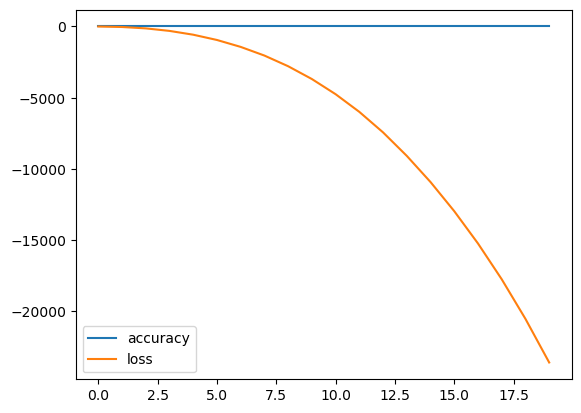

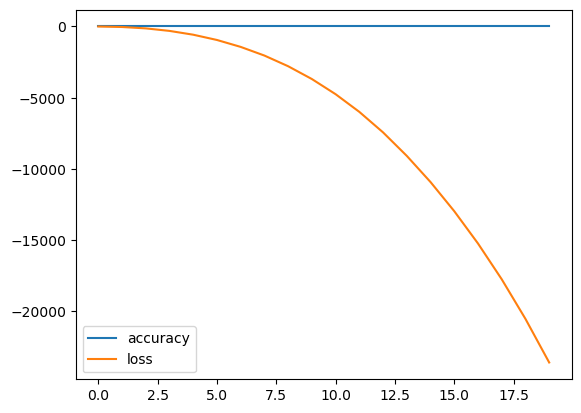

In [20]:
metrics_df = pd.DataFrame(h1.history)
metrics_df.plot()
plt.show()